# Overview
The below code loops through all of the socioeconomic datasets from 2010-2016

Current data transformations:
* Removed the first row of each file, the first is a repeat of the column headers (also may replace column headers if we want).
* Removed Country and State Level data, which are indicated by their 5-digit FIPS code being % 1000 == 0

Still Need To:
* Decide exactly which columns we want to use
* Make sure for these columns that we parse them as the correct dtype

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

## Loading Socioeconomic Data

In [2]:
all_socio_df = []


for i in range(0,7):
    '''
    If we want to get specific columns of the dataframe, we can use the usecols list. Note that we cannot specify
    the dtype here as the second row of the dataframe (which has string values) interferes with it. We could solve
    this by removing the second row of the csv or specifying dtypes later:
    
    current_df = pd.read_csv('../data/county_level/countyhealthranking/analytic_data201' + str(i) + '.csv',
                             usecols = ['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'Name'])    
    
    '''
    current_df = pd.read_csv('../../data/county_level/countyhealthranking/analytic_data201' + str(i) + '.csv')
    
    
    '''
    I am not sure which row we want to use for the headings of the dataframe. The two options right now are
    the first and second rows of the csvs. The current code uses the first row as the names. If we want to use
    the second row instead, comment out the line below this comment and replace it with:
    
    # The below code essentially makes the second row in the csv the header for the dataframe
    new_header = current_df.iloc[0] #grab the first row for the header
    current_df = current_df[1:] #take the data less the header row
    current_df.columns = new_header #set the header row as the df header    
    '''
    current_df = current_df.drop(0)
    
    '''
    We also want to filter out the data that belongs to the US and each individual state. We can do this by looking
    at the 5-digit FIPS code (fipscode), where if fipscode % 1000 == 0, then the row belongs to a state. We also 
    want this row to be of type int32. We will have to deal with typing later for other columns as well.
    
    We will need to change the hardcoded '5-digit FIPS Code' and 'Release Year' if we change the column headers
    '''
    current_df['5-digit FIPS Code'] = current_df['5-digit FIPS Code'].astype(str).astype(int)
    current_df['Release Year'] = current_df['Release Year'].astype(str).astype(int)
    current_df = current_df[current_df['5-digit FIPS Code'] % 1000 != 0]
    
    all_socio_df.append(current_df)
    
# ignore_index = True just reindexes the rows for the new dataframe
socio_df = pd.concat(all_socio_df, ignore_index=True)

/homes/iws/bhimar/cse481ds-mental-health/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,24

/homes/iws/bhimar/cse481ds-mental-health/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,24

## Loading Mental Health Data

In [3]:
mental_health_df = pd.read_csv('../../data/county_level/Compressed Mortality, 1999-2016.txt', sep='\t',
                               usecols = ['County Code', 'Year', 'Deaths', 'Population'])

# There is text at the bottom of the file that we do not want to include
mental_health_df = mental_health_df[mental_health_df['County Code'].notnull()]

# The numbers are parsed as floats but we want them to be ints
for column_name in mental_health_df.columns:
    mental_health_df[column_name] = mental_health_df[column_name].astype(int)

## Merging datasets

In [4]:
# This is by default an inner join, which makes sense since we only want to match when year and county code are the same
full_df = pd.merge(socio_df, mental_health_df,
                   left_on=['5-digit FIPS Code', 'Release Year'],
                   right_on=['County Code', 'Year'])

# As we can see, we can now see the deaths column in our full dataframe
full_df['Deaths']

0       12
1       31
2       11
3       13
4       14
        ..
6319    10
6320    19
6321    25
6322    17
6323    10
Name: Deaths, Length: 6324, dtype: int64

## Analyzing Data
Right now I am only showing the null values in the data using the missingno library, we can utilize other things from this library from here: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

Note that since we currently have so many columns, this is not very helpful, but once we narrow down the columns then this should give us insights

<AxesSubplot:>

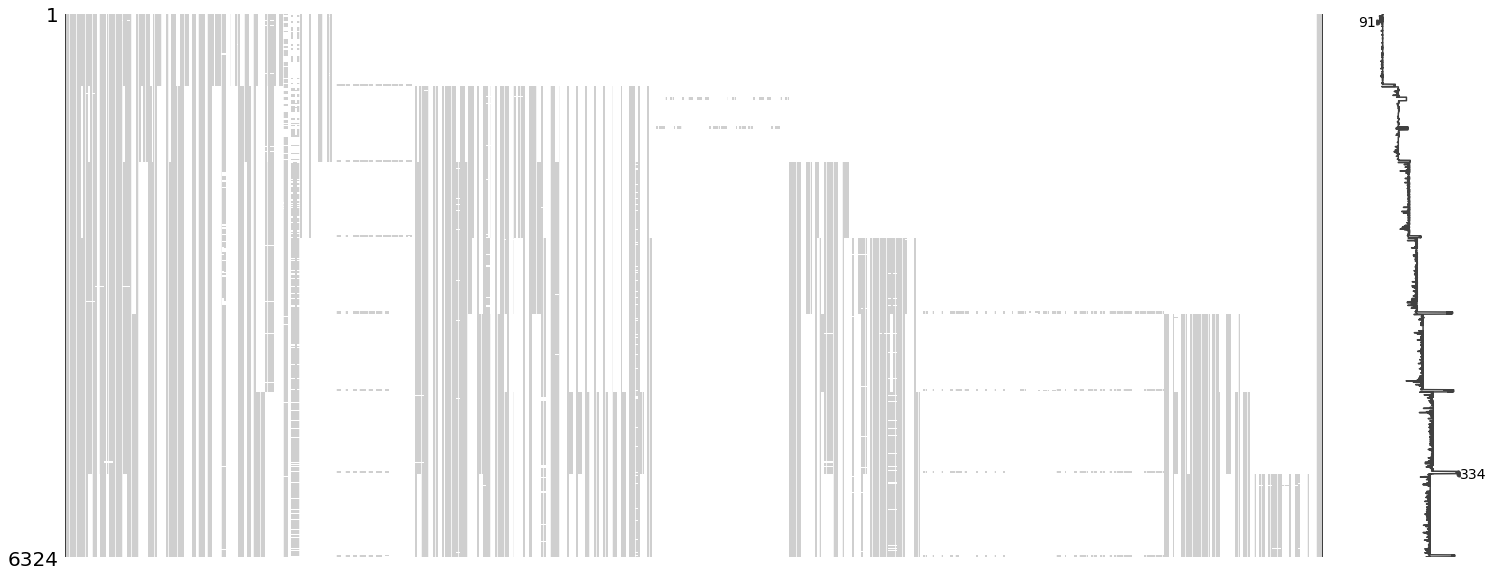

In [5]:
msno.matrix(full_df)

## Saving the Data
Saving data to csv`

In [16]:
# write to csv
full_df.to_csv("../../data/county_level/full_df.csv")

'''
We can read back in the dataframe from this pickle using the following command:
output = pd.read_csv("../data/county_level/full_df.csv")

'''


'\nWe can read back in the dataframe from this pickle using the following command:\noutput = pd.read_csv("../data/county_level/full_df.csv")\n\n'

In [17]:
df = pd.read_csv("../../data/county_level/full_df.csv")

In [18]:
print(df)

      Unnamed: 0  State FIPS Code  County FIPS Code  5-digit FIPS Code  \
0              0                1                 1               1001   
1              1                1                 3               1003   
2              2                1                 9               1009   
3              3                1                15               1015   
4              4                1                31               1031   
...          ...              ...               ...                ...   
6319        6319               56                 1              56001   
6320        6320               56                13              56013   
6321        6321               56                21              56021   
6322        6322               56                25              56025   
6323        6323               56                29              56029   

     State Abbreviation            Name  Release Year  \
0                    AL  Autauga County          2010 

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 712 columns):
 #    Column                                                               Dtype  
---   ------                                                               -----  
 0    Unnamed: 0                                                           int64  
 1    State FIPS Code                                                      int64  
 2    County FIPS Code                                                     int64  
 3    5-digit FIPS Code                                                    int64  
 4    State Abbreviation                                                   object 
 5    Name                                                                 object 
 6    Release Year                                                         int64  
 7    County Ranked (Yes=1/No=0)                                           float64
 8    Premature death raw value                               

In [20]:
df = df.infer_objects() # infer datatypes for each column if possible
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 712 columns):
 #    Column                                                               Dtype  
---   ------                                                               -----  
 0    Unnamed: 0                                                           int64  
 1    State FIPS Code                                                      int64  
 2    County FIPS Code                                                     int64  
 3    5-digit FIPS Code                                                    int64  
 4    State Abbreviation                                                   object 
 5    Name                                                                 object 
 6    Release Year                                                         int64  
 7    County Ranked (Yes=1/No=0)                                           float64
 8    Premature death raw value                               

In [21]:
df = df.dropna(axis=1, how='all') # drop all columns that are entirely missing
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 515 columns):
 #    Column                                                               Dtype  
---   ------                                                               -----  
 0    Unnamed: 0                                                           int64  
 1    State FIPS Code                                                      int64  
 2    County FIPS Code                                                     int64  
 3    5-digit FIPS Code                                                    int64  
 4    State Abbreviation                                                   object 
 5    Name                                                                 object 
 6    Release Year                                                         int64  
 7    County Ranked (Yes=1/No=0)                                           float64
 8    Premature death raw value                               

<AxesSubplot:>

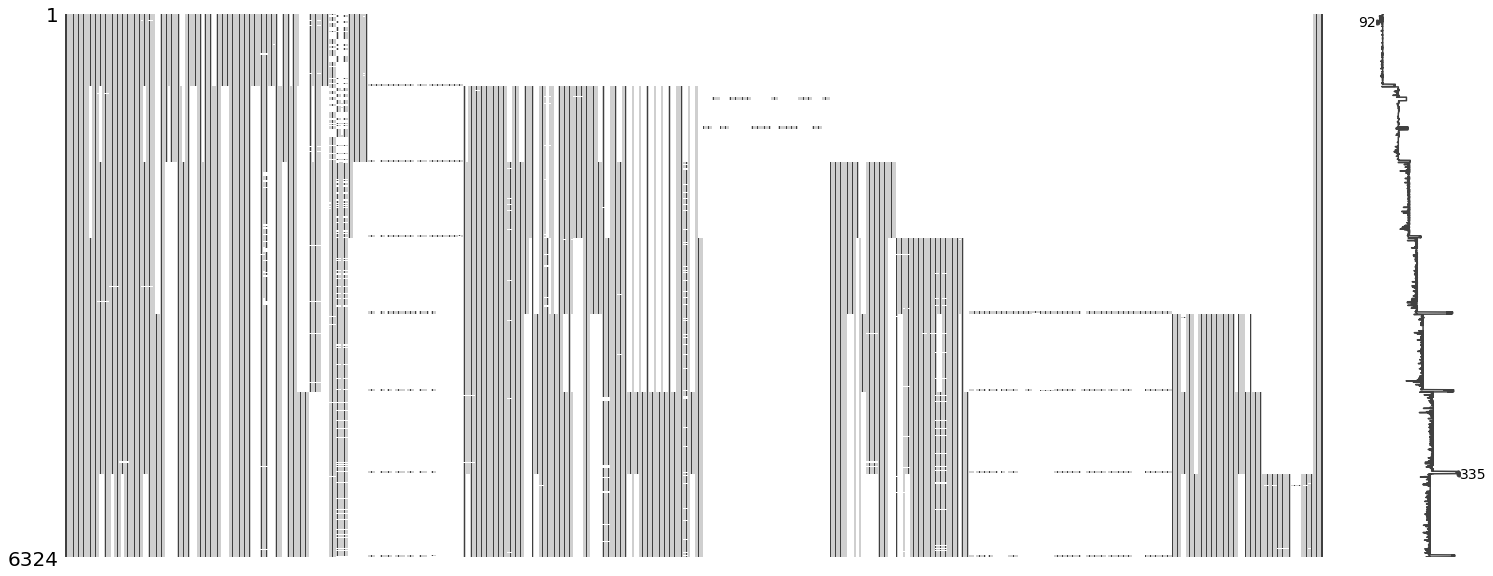

In [22]:
msno.matrix(df)

In [24]:
df.to_csv("../../data/county_level/full_df.csv") # save df again